In [3]:
import numpy as np

sd1, sd2, sd3 = 0.1, 0.15, 0.12
corr12, corr13, corr23 = 0.5, 0.7, 0.6
w1, w2, w3 = 0.2, 0.3, 0.5

S = np.diag([sd1, sd2, sd3])
R = np.identity(3)
R[0, 1] = R[1, 0] = corr12
R[0, 2] = R[2, 0] = corr13
R[1, 2] = R[2, 1] = corr23
C = S @ R @ S
w = np.array([w1, w2, w3])
portvar = w @ C @ w

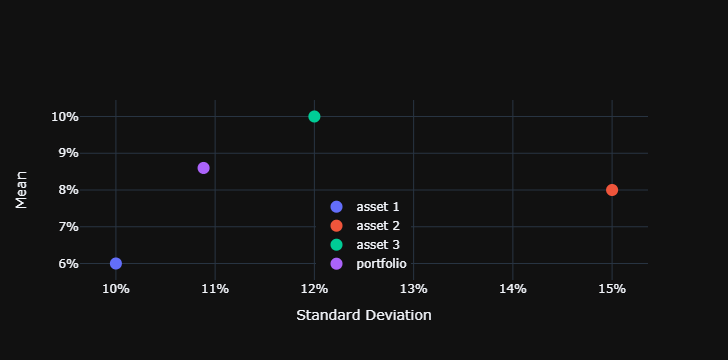

In [4]:
import plotly.graph_objects as go
import numpy as np

mn1, mn2, mn3 = 0.06, 0.08, 0.10
sd1, sd2, sd3 = 0.1, 0.15, 0.12
corr12, corr13, corr23 = 0.5, 0.7, 0.6
w1, w2, w3 = 0.2, 0.3, 0.5

S = np.diag([sd1, sd2, sd3])
R = np.identity(3)
R[0, 1] = R[1, 0] = corr12
R[0, 2] = R[2, 0] = corr13
R[1, 2] = R[2, 1] = corr23
C = S @ R @ S
w = np.array([w1, w2, w3])
mns = np.array([mn1, mn2, mn3])
portmn = w @ mns
portsd = np.sqrt(w @ C @ w)
trace1 = go.Scatter(
  x=[sd1],
  y=[mn1],
  mode="markers",
  marker=dict(size=12),
  name="asset 1",
  hovertemplate="asset 1<br>mean=%{y:.0%}<br>std dev=%{x:.0%}<extra></extra>"
)
trace2 = go.Scatter(
  x=[sd2],
  y=[mn2],
  mode="markers",
  marker=dict(size=12),
  name="asset 2",
  hovertemplate="asset 2<br>mean=%{y:.0%}<br>std dev=%{x:.0%}<extra></extra>"
)
trace3 = go.Scatter(
  x=[sd3],
  y=[mn3],
  mode="markers",
  marker=dict(size=12),
  name="asset 3",
  hovertemplate="asset 3<br>mean=%{y:.0%}<br>std dev=%{x:.0%}<extra></extra>"
)
trace4 = go.Scatter(
  x=[portsd],
  y=[portmn],
  mode="markers",
  marker=dict(size=12),
  name="portfolio",
  hovertemplate="portfolio<br>mean=%{y:.1%}<br>std dev=%{x:.1%}<extra></extra>"
)
fig = go.Figure()
for trace in (trace1, trace2, trace3, trace4):
  fig.add_trace(trace)

fig.update_layout(
    template="plotly_dark",
    xaxis_title="Standard Deviation",
    yaxis_title="Mean",
    yaxis_tickformat=".0%",
    xaxis_tickformat=".0%",
    legend=dict(
        yanchor="bottom", 
        y=0.01, 
        xanchor="center", 
        x=0.5
    )
  )

fig.show()